### OCR(광학문자판독)

* 이미지로 된 문자를 텍스트로 변환하는 작업
* Tesseract API, 구글 OCR API, Naver OCR API  등을 사용
* Tesseract API 다운로드 : http://github.com/UB-Mannheim/tesseract/wiki
    * tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe 파일 다운로드
    * 설치시에 Additional language data 체크


In [1]:
# 파이썬용 Tessaract API 설치
!pip install pytesseract

In [2]:
# 설치 위치를 지정
import pytesseract

pytesseract.pytesseract.tesseract_cmd = \
            r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [3]:
import cv2
import matplotlib.pyplot as plt

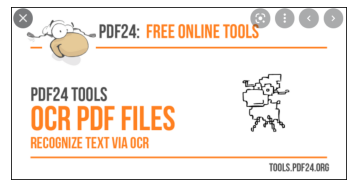

In [4]:
# 이미지 불러오기
img = cv2.imread('./image/text.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [5]:
# 이미지에서 문자열을 추출
# lang = "eng" : 언어를 영어로 설정(한글 : kor)
result = pytesseract.image_to_string(img, lang="eng")

print(result)

*o.. PDF24: FREE ONLINE ro? ooo

24 TOOLS
mS us | A

RECOGNIZE TEXT VIA OCR

TOOLS.PDF24.0R6



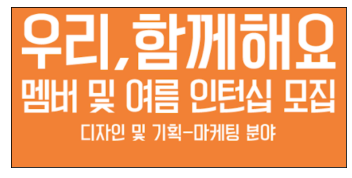

In [6]:
img = cv2.imread('./image/story.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [7]:
result = pytesseract.image_to_string(img, lang="kor")

print(result)

우리,함해요
비느내캐미리때2
디자민 및 |획-마케팀 분마



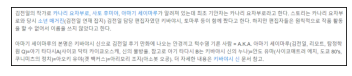

In [8]:
img = cv2.imread('./image/test.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [9]:
result = pytesseract.image_to_string(img, lang="kor")

print(result)

전일의 작가로 카나리 요자부로, 사토 후미야 아마기 세이마루가 알려져 있는데 최초 기안자는 카나리 요자부로라고 한다. 스
와 당시 소년 매거진(김전일 연재 잡지) 김전일 담당 편집자였던 키바야시, 토마루 등이 함께 쌓다고 한다. 하지만 편집자들은
을 할 수 없어서 이름을 쓰지 않았다고 한다.

토리는 카나리 요자부
원칙적으로 작품 활동

01 0블

아마기 세이마루의 본명은 키바야시 신으로 김전일 후기 만화에 나오는 안경끼고 턱수염 기른 사람 = <. 아마기 세이마루(김전일, 리모트, 탐정학
원 @)=아기 타다시4#(사이코 닥터 카이쿄오스케, 신의 물방울. 참고로 아기 타다시 6는 키바야시 신의 누나)=안도 유마(사이코매트러 에지, 도쿄 806,
쿠니미츠의 정치)=아오키 유야( 백커스)=아리모리 조지(아소봇 오공). 더 자세한 내용은 키바야시 신 문서 참고.



* tesseractAPI를 사용할 때는 이진 이미지로 변경한 후에 사용하는 것을 권장함

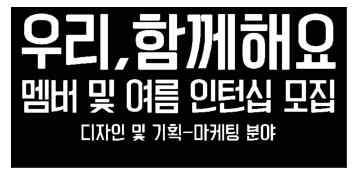

In [10]:
img = cv2.imread('./image/story.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 흑백이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진이미지로 변경
_, binary = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])
plt.imshow(binary, cmap="gray")

In [11]:
result = pytesseract.image_to_string(binary, lang="kor")

print(result)

우리,함해요
비느패!크미리새르으
디자인 및 기획-마케팀 분마



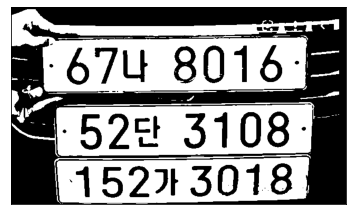

In [12]:
img = cv2.imread('./image/car.png')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# 흑백이미지로 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 이진이미지로 변경
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])
# plt.imshow(img)
plt.imshow(binary, cmap="gray")

In [13]:
result = pytesseract.image_to_string(binary, lang="kor")

print(result)

| 674 8016 를

 

 

0. ㄷ2단 3108
| 152가 3018 |

 

 



### harrcascade 알고리즘을 이용해서 얼굴과 눈 영역 추출

In [14]:
# 알고리즘 등록
face_cascade = cv2.CascadeClassifier("./image/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("./image/haarcascade_eye.xml")

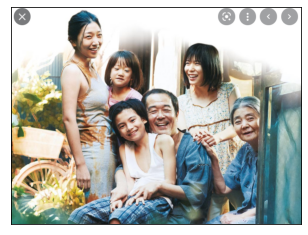

In [15]:
img = cv2.imread("./image/face.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.xticks([])
plt.yticks([])
plt.imshow(img)

In [16]:
# 얼굴 영역 검출
# scaleFactor : 확대비율만큼 확대해 가면서 검색, 작은 값일수록 자세히 찾지만 연산량이 증가하는 단점이 있음
# minNeighbors : 후보 사각형이 유지해야 하는 최소 이웃의 수. 값이 클수록 덜 감지되지만 정확도는 증가
# 반환값 : 얼굴들의 좌상단좌표와 가로세로 크기가 튜플 형태로 반환
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.4, minNeighbors=7)

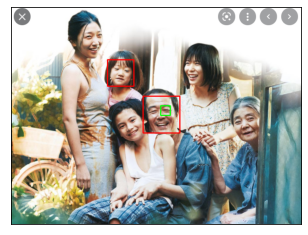

In [17]:
# 검색된 얼굴영역을 표시
for (x, y, w, h) in faces :
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    # 얼굴 영역 내에서 눈 영역을 검출
    # 얼굴 ROI 자르기
    roi_gray = gray[y:y+h, x:x+w]
    roi_img = img[y:y+h, x:x+w]
    
    # 눈 영역 검출
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.01, 9)
    
    # 검출된 눈 영역을 표시
    for (ex, ey, ew, eh) in eyes :
        cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
plt.xticks([])
plt.yticks([])
plt.imshow(img)

### 동영상에서 얼굴과 눈 검출하기

In [18]:
# try ~ except : try문의 명령에서 에러가 발생하면 except문의 명령이 실행
try : 
    cap = cv2.VideoCapture("./image/song.mp4")
except:
    print("비디오 캡처 실패")
    
while True:
    ret, frame = cap.read()
    
    if not ret :  # 동영상이 프레임을 못 읽었다면
        print('프레임 읽기 실패')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.4, minNeighbors=10)
    
    # 검색된 얼굴영역을 표시
    for (x, y, w, h) in faces :
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # 얼굴 영역 내에서 눈 영역을 검출
        # 얼굴 ROI 자르기
        roi_gray = gray[y:y+h, x:x+w]
        roi_img = frame[y:y+h, x:x+w]

        # 눈 영역 검출
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 20)

        # 검출된 눈 영역을 표시
        for (ex, ey, ew, eh) in eyes :
            cv2.rectangle(roi_img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
    cv2.imshow("face detect", frame)
    
    k = cv2.waitKey(33)
    
    if k == 49:
        cap.release()
        cv2.destroyAllWindows()
        break

### Dlib 라이브러리를 이용한 얼굴 검출

- dlib는 얼굴영상에서 68개 랜드마크 점을 검출

- 설치하기

In [19]:
# dlib 설치시 cmake 에러가 뜨는 경우 설치
!pip install cmake

In [ ]:
!pip install dlib


        return orig.install.run(self)
      File "C:\Users\jupiter\anaconda3\lib\distutils\command\install.py", line 545, in run
        self.run_command('build')
      File "C:\Users\jupiter\anaconda3\lib\distutils\cmd.py", line 313, in run_command
        self.distribution.run_command(command)
      File "C:\Users\jupiter\anaconda3\lib\distutils\dist.py", line 985, in run_command
        cmd_obj.run()
      File "C:\Users\jupiter\anaconda3\lib\distutils\command\build.py", line 135, in run
        self.run_command(cmd_name)
      File "C:\Users\jupiter\anaconda3\lib\distutils\cmd.py", line 313, in run_command
        self.distribution.run_command(command)
      File "C:\Users\jupiter\anaconda3\lib\distutils\dist.py", line 985, in run_command
        cmd_obj.run()
      File "C:\Users\jupiter\AppData\Local\Temp\pip-install-ms2jto0x\dlib_7f4019301d2545ee8d45910e8750c1ea\setup.py", line 134, in run
        self.build_extension(ext)
      File "C:\Users\jupiter\AppData\Local\Temp\pip-ins